In [1]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense, BatchNormalization
from keras import backend as K
import tensorflow as tf
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import multiprocess

%cd G:\My Drive

G:\My Drive


In [2]:
PATH = 'G:/My Drive/data/'
TRAIN_PATH = 'train/'

In [3]:
from PIL import Image, ImageOps
import os
import numpy as np
import re
import random

In [4]:
IMAGE_HEIGHT = 128
IMAGE_WIDTH = 128

In [5]:
def load_data(path, count, X, Y, filenames, index):
    cats = 0
    dogs = 0
    for i in range(index * count, (index + 1) * count):
        filename = filenames[i]
        try:
            if (filename.split('.')[0] == 'cat'):
                if (cats >= count / 2):
                    continue
                Y[i][0] = 1
                Y[i][1] = 0
                cats += 1
            else:
                if (dogs >= count / 2):
                    continue
                Y[i][0] = 0
                Y[i][1] = 1
                dogs += 1
            img = cv.imread(path + filename)
            img = cv.resize(img, (IMAGE_WIDTH, IMAGE_HEIGHT))
            #Apply canny edge detection
            img = cv.Canny(img, 100, 200, L2gradient=True)
            for x in range(len(img)):
                for y in range(len(img[0])):
                    X[i][x][y] = img[x][y]
        except Exception as e:
            print(e);
            print('ERROR: failed to load data')
            print(i)
            continue
        if cats + dogs == count:
            break

In [6]:
 #Load the data
DATA_SIZE = 15000
filenames = os.listdir(PATH + TRAIN_PATH)
X = np.zeros((DATA_SIZE, IMAGE_WIDTH, IMAGE_HEIGHT, 3))
Y = np.zeros((DATA_SIZE, 2))
random.shuffle(filenames)
load_data(PATH + TRAIN_PATH, DATA_SIZE, X, Y, filenames, 0)

# Define training and testing data

In [7]:
# Split the data
x_train, x_test, y_train, y_test = train_test_split(X, Y)

print(len(x_train), len(x_test))

# Garbage collection
X = None
Y = None

11250 3750


In [8]:
x_train = np.asarray(x_train).astype(np.uint8) / 255
y_train = np.asarray(y_train).astype(np.uint8)
x_test = np.asarray(x_test).astype(np.uint8) / 255
y_test = np.asarray(y_test).astype(np.uint8)

In [9]:
EPOCHS = 15

In [10]:
input_shape = x_train[0].shape;

(128, 128, 3)


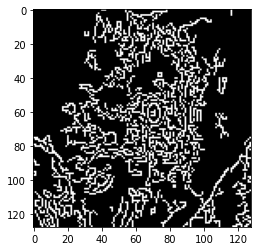

In [11]:
print(input_shape)
plt.imshow(x_train[1])

In [12]:
model = Sequential()
model.add(Conv2D(8, (3, 3), padding="same", activation="relu", input_shape=input_shape))
model.add(Conv2D(16, (3, 3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(16, (3, 3), padding="same", activation="relu"))
model.add(Conv2D(32, (3, 3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(32, (3, 3), padding="same", activation="relu"))
model.add(Conv2D(32, (3, 3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(2, activation="sigmoid"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 8)       224       
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 16)      1168      
                                                                 
 batch_normalization (BatchN  (None, 128, 128, 16)     64        
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 16)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 64, 64, 16)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 16)        2

In [13]:
model.compile(loss='categorical_crossentropy',
			optimizer='adam',
			metrics=['accuracy'])

In [14]:
history = model.fit(x_train, y_train, epochs=EPOCHS, validation_data=(x_test, y_test), batch_size=64)

Epoch 1/15
176/176 [==============================] - 13s 48ms/step - loss: 0.7216 - accuracy: 0.6139 - val_loss: 3.1302 - val_accuracy: 0.4891
Epoch 2/15
176/176 [==============================] - 7s 41ms/step - loss: 0.6217 - accuracy: 0.6625 - val_loss: 0.6882 - val_accuracy: 0.5315
Epoch 3/15
176/176 [==============================] - 7s 41ms/step - loss: 0.5576 - accuracy: 0.7137 - val_loss: 1.9313 - val_accuracy: 0.4891
Epoch 4/15
176/176 [==============================] - 7s 41ms/step - loss: 0.5202 - accuracy: 0.7470 - val_loss: 0.5224 - val_accuracy: 0.7448
Epoch 5/15
176/176 [==============================] - 7s 41ms/step - loss: 0.5052 - accuracy: 0.7527 - val_loss: 0.5252 - val_accuracy: 0.7400
Epoch 6/15
176/176 [==============================] - 7s 41ms/step - loss: 0.4911 - accuracy: 0.7659 - val_loss: 2.1978 - val_accuracy: 0.5256
Epoch 7/15
176/176 [==============================] - 7s 41ms/step - loss: 0.4853 - accuracy: 0.7639 - val_loss: 0.4851 - val_accuracy: 0.761

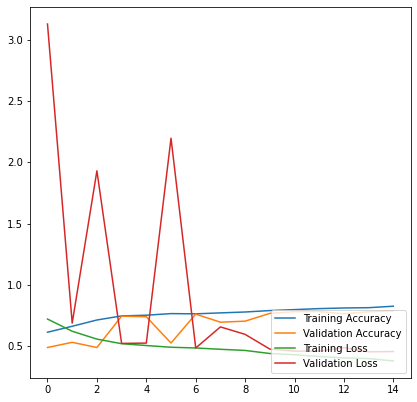

In [15]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='lower right')
plt.title('')
plt.show()